In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
print("Columns in dataset:")
print(df.columns.tolist())

Columns in dataset:
['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


In [4]:
print(df.isnull().sum())

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64


In [5]:
for col in df.columns:
    print(f"{col}: {len(df)}")


Transaction_ID: 293911
Customer_ID: 293911
Name: 293911
Email: 293911
Phone: 293911
Address: 293911
City: 293911
State: 293911
Zipcode: 293911
Country: 293911
Age: 293911
Gender: 293911
Income: 293911
Customer_Segment: 293911
Date: 293911
Year: 293911
Month: 293911
Time: 293911
Total_Purchases: 293911
Amount: 293911
Total_Amount: 293911
Product_Category: 293911
Product_Brand: 293911
Product_Type: 293911
Feedback: 293911
Shipping_Method: 293911
Payment_Method: 293911
Order_Status: 293911
Ratings: 293911
products: 293911


In [6]:
print(df['Product_Category'].value_counts())

Product_Category
Electronics    69365
Grocery        65126
Clothing       53282
Books          53199
Home Decor     52939
Name: count, dtype: int64


In [7]:
columns_to_check = [
    'Age',
    'Gender',
    'Income',
    'Customer_Segment',
    'Total_Purchases',
    'Amount',
    'Total_Amount',
    'Product_Brand',
    'Product_Type',
    'Feedback',
    'Ratings',
    'products'
]

print(df[columns_to_check].dtypes)


Age                 float64
Gender               object
Income               object
Customer_Segment     object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Brand        object
Product_Type         object
Feedback             object
Ratings             float64
products             object
dtype: object


In [8]:
# List of columns you want to check
columns_to_check = [
    'Age', 'Gender', 'Income', 'Customer_Segment', 'Total_Purchases', 'Amount',
    'Total_Amount', 'Product_Brand', 'Product_Type', 'Feedback', 'Ratings', 'products'
]

# Select float columns
float_cols = df[columns_to_check].select_dtypes(include=['float64', 'int64']).columns.tolist()

# Select object columns
object_cols = df[columns_to_check].select_dtypes(include=['object']).columns.tolist()

print("Float/Numeric columns:", float_cols)
print("Object/Categorical columns:", object_cols)


Float/Numeric columns: ['Age', 'Total_Purchases', 'Amount', 'Total_Amount', 'Ratings']
Object/Categorical columns: ['Gender', 'Income', 'Customer_Segment', 'Product_Brand', 'Product_Type', 'Feedback', 'products']


In [9]:
# Count non-null values for selected columns
print(df[columns_to_check].count())

Age                 293911
Gender              293911
Income              293911
Customer_Segment    293911
Total_Purchases     293911
Amount              293911
Total_Amount        293911
Product_Brand       293911
Product_Type        293911
Feedback            293911
Ratings             293911
products            293911
dtype: int64


In [10]:
print(df[float_cols].describe(include='all'))

                 Age  Total_Purchases         Amount   Total_Amount  \
count  293911.000000    293911.000000  293911.000000  293911.000000   
mean       35.465767         5.359864     255.153307    1367.686983   
std        15.017749         2.868440     141.388614    1128.895164   
min        18.000000         1.000000      10.000219      10.003750   
25%        22.000000         3.000000     132.839683     438.852849   
50%        32.000000         5.000000     255.463226    1041.164351   
75%        46.000000         8.000000     377.638576    2028.954272   
max        70.000000        10.000000     499.997911    4999.625796   

             Ratings  
count  293911.000000  
mean        3.162301  
std         1.320762  
min         1.000000  
25%         2.000000  
50%         3.000000  
75%         4.000000  
max         5.000000  


In [11]:
print(df[float_cols].isnull().sum())
print(df[object_cols].isnull().sum())


Age                0
Total_Purchases    0
Amount             0
Total_Amount       0
Ratings            0
dtype: int64
Gender              0
Income              0
Customer_Segment    0
Product_Brand       0
Product_Type        0
Feedback            0
products            0
dtype: int64


In [12]:
print(df[float_cols].count())
print(df[object_cols].count())

Age                293911
Total_Purchases    293911
Amount             293911
Total_Amount       293911
Ratings            293911
dtype: int64
Gender              293911
Income              293911
Customer_Segment    293911
Product_Brand       293911
Product_Type        293911
Feedback            293911
products            293911
dtype: int64


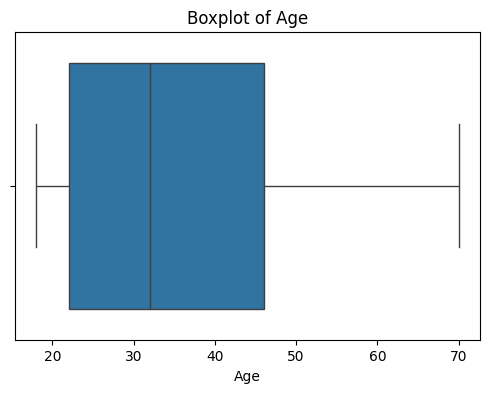

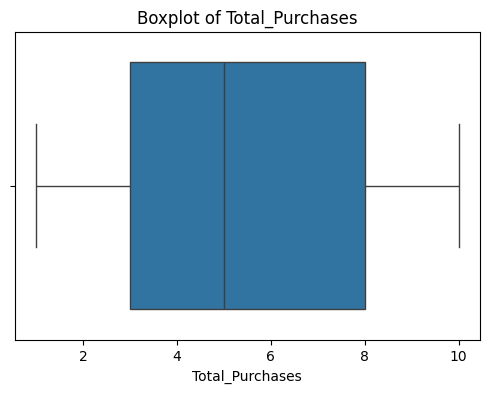

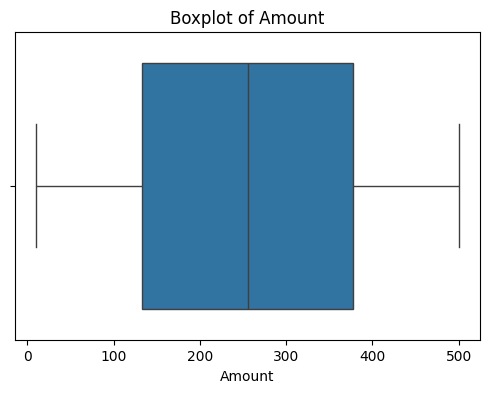

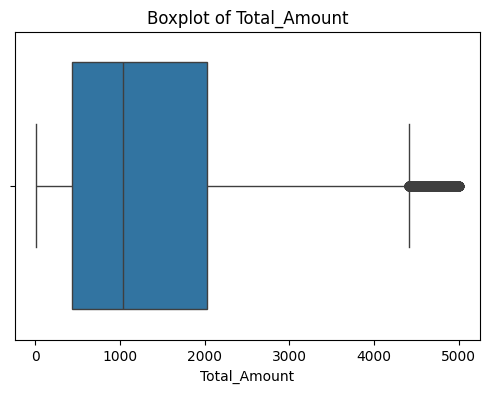

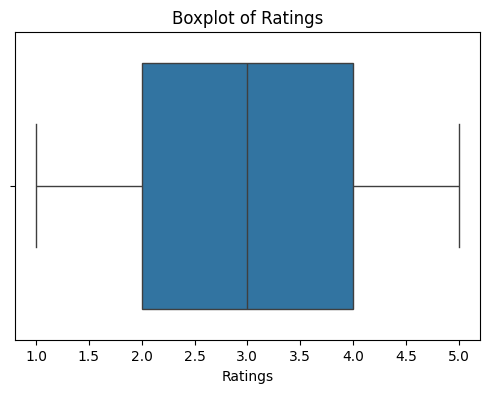

Age                293911
Total_Purchases    293911
Amount             293911
Total_Amount       293911
Ratings            293911
dtype: int64


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
float_cols = df[columns_to_check].select_dtypes(include=['float64', 'int64']).columns.tolist()

# Plot boxplot for each numeric column
for col in float_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
print(df[float_cols].count())

In [14]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers.count()

for col in float_cols:
    outlier_count = count_outliers(df[col])
    print(f"Outliers in {col}: {outlier_count}")
print(df[float_cols].count())

Outliers in Age: 0
Outliers in Total_Purchases: 0
Outliers in Amount: 0
Outliers in Total_Amount: 3816
Outliers in Ratings: 0
Age                293911
Total_Purchases    293911
Amount             293911
Total_Amount       293911
Ratings            293911
dtype: int64


In [15]:
Q1 = df['Total_Amount'].quantile(0.25)
Q3 = df['Total_Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['Total_Amount_capped'] = df['Total_Amount'].clip(lower=lower_bound, upper=upper_bound)
print(df[float_cols].count())

Age                293911
Total_Purchases    293911
Amount             293911
Total_Amount       293911
Ratings            293911
dtype: int64


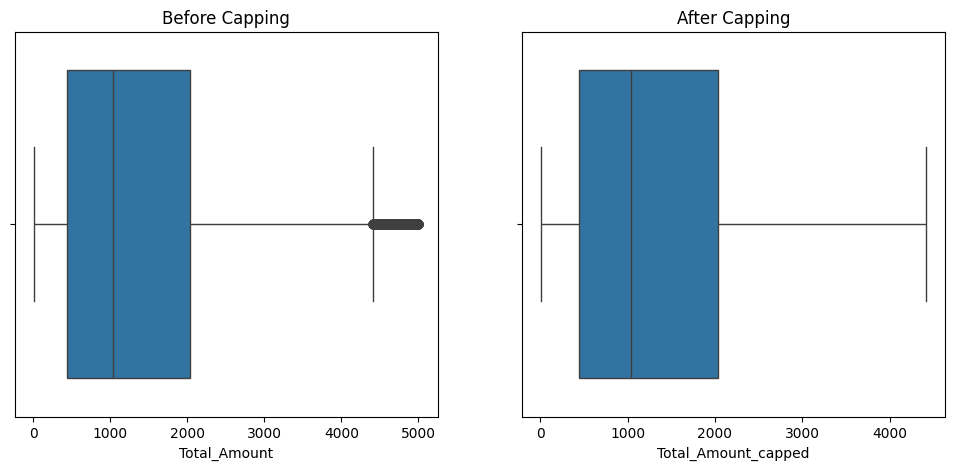

Age                293911
Total_Purchases    293911
Amount             293911
Total_Amount       293911
Ratings            293911
dtype: int64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Total_Amount'])
plt.title('Before Capping')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Total_Amount_capped'])
plt.title('After Capping')

plt.show()
print(df[float_cols].count())

In [17]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers.count()
df['Total_Amount'] = df['Total_Amount_capped']
for col in float_cols:
    outlier_count = count_outliers(df[col])
    print(f"Outliers in {col}: {outlier_count}")
print(df[float_cols].count())

Outliers in Age: 0
Outliers in Total_Purchases: 0
Outliers in Amount: 0
Outliers in Total_Amount: 0
Outliers in Ratings: 0
Age                293911
Total_Purchases    293911
Amount             293911
Total_Amount       293911
Ratings            293911
dtype: int64


In [18]:
print(df[float_cols].describe(include='all'))
print(df[float_cols].count())

                 Age  Total_Purchases         Amount   Total_Amount  \
count  293911.000000    293911.000000  293911.000000  293911.000000   
mean       35.465767         5.359864     255.153307    1364.342767   
std        15.017749         2.868440     141.388614    1119.257009   
min        18.000000         1.000000      10.000219      10.003750   
25%        22.000000         3.000000     132.839683     438.852849   
50%        32.000000         5.000000     255.463226    1041.164351   
75%        46.000000         8.000000     377.638576    2028.954272   
max        70.000000        10.000000     499.997911    4414.106406   

             Ratings  
count  293911.000000  
mean        3.162301  
std         1.320762  
min         1.000000  
25%         2.000000  
50%         3.000000  
75%         4.000000  
max         5.000000  
Age                293911
Total_Purchases    293911
Amount             293911
Total_Amount       293911
Ratings            293911
dtype: int64


In [19]:
df[float_cols].head()

,Age,Total_Purchases,Amount,Total_Amount,Ratings
0,21.0,3.0,108.028757,324.086270,5.0
1,19.0,2.0,403.353907,806.707815,4.0
2,48.0,3.0,354.477600,1063.432799,2.0
3,56.0,7.0,352.407717,2466.854021,4.0
4,22.0,2.0,124.276524,248.553049,1.0


In [20]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming float_cols is a list of your float column names including 'Ratings'
float_cols_except_ratings = [col for col in float_cols if col != 'Ratings']

# Now copy only those columns except 'Ratings'
float_data_copy = df[float_cols_except_ratings].copy()

# To verify
print(float_data_copy.head())


# Check for missing values
print("Missing values before scaling:")
print(float_data_copy.isnull().sum())

# Fill missing values if any
float_data_copy = float_data_copy.fillna(float_data_copy.mean())

# Initialize scaler and fit_transform on the copy
scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(float_data_copy)

# Convert scaled values back to DataFrame with original index and columns
df_scaled = pd.DataFrame(df_scaled_values, columns=float_cols_except_ratings, index=df.index)

# Now, if you want to update the original df with scaled values:
# Print first 5 rows
print(df_scaled.head())

# Print count of non-missing values per column
# print(df_scaled.count())
# print(df[float_cols].count())
df[float_cols_except_ratings] = df_scaled
print(df[float_cols].count())

    Age  Total_Purchases      Amount  Total_Amount
0  21.0              3.0  108.028757    324.086270
1  19.0              2.0  403.353907    806.707815
2  48.0              3.0  354.477600   1063.432799
3  56.0              7.0  352.407717   2466.854021
4  22.0              2.0  124.276524    248.553049
Missing values before scaling:
Age                0
Total_Purchases    0
Amount             0
Total_Amount       0
dtype: int64
        Age  Total_Purchases    Amount  Total_Amount
0 -0.963246        -0.822701 -1.040570     -0.929419
1 -1.096422        -1.171323  1.048181     -0.498220
2  0.834629        -0.822701  0.702493     -0.268848
3  1.367333         0.571788  0.687853      0.985040
4 -0.896658        -1.171323 -0.925654     -0.996904
Age                293911
Total_Purchases    293911
Amount             293911
Total_Amount       293911
Ratings            293911
dtype: int64


In [21]:
df[float_cols].head()

,Age,Total_Purchases,Amount,Total_Amount,Ratings
0,-0.963246,-0.822701,-1.040570,-0.929419,5.0
1,-1.096422,-1.171323,1.048181,-0.498220,4.0
2,0.834629,-0.822701,0.702493,-0.268848,2.0
3,1.367333,0.571788,0.687853,0.985040,4.0
4,-0.896658,-1.171323,-0.925654,-0.996904,1.0


In [22]:
for col in object_cols:
    print(f"--- Checking column: {col} ---")
    unique_vals = df[col].unique()
    print(f"Unique values ({len(unique_vals)}): {unique_vals[:10]} ...")  # show first 10 unique values
    print(f"Number of unique values: {len(unique_vals)}")

--- Checking column: Gender ---
Unique values (2): ['Male' 'Female'] ...
Number of unique values: 2
--- Checking column: Income ---
Unique values (3): ['Low' 'High' 'Medium'] ...
Number of unique values: 3
--- Checking column: Customer_Segment ---
Unique values (3): ['Regular' 'Premium' 'New'] ...
Number of unique values: 3
--- Checking column: Product_Brand ---
Unique values (18): ['Nike' 'Samsung' 'Penguin Books' 'Home Depot' 'Nestle' 'Apple' 'Zara'
 'Random House' 'Coca-Cola' 'Adidas'] ...
Number of unique values: 18
--- Checking column: Product_Type ---
Unique values (33): ['Shorts' 'Tablet' "Children's" 'Tools' 'Chocolate' 'Television' 'Shirt'
 'Decorations' 'Non-Fiction' 'Water'] ...
Number of unique values: 33
--- Checking column: Feedback ---
Unique values (4): ['Excellent' 'Average' 'Bad' 'Good'] ...
Number of unique values: 4
--- Checking column: products ---
Unique values (318): ['Cycling shorts' 'Lenovo Tab' 'Sports equipment' 'Utility knife'
 'Chocolate cookies' 'QLED TV' 

In [23]:
# Define mapping dictionaries for custom order encoding
income_map = {'Low': 0, 'Medium': 1, 'High': 2}
segment_map = {'New': 0, 'Regular': 1, 'Premium': 2}
feedback_map = {'Bad': 0, 'Average': 1, 'Good': 2, 'Excellent': 3}

# Apply the mappings
df['Income_encoded'] = df['Income'].map(income_map)
df['Customer_Segment_encoded'] = df['Customer_Segment'].map(segment_map)
df['Feedback_encoded'] = df['Feedback'].map(feedback_map)

print("Original")
print(df[['Income', 'Customer_Segment', 'Feedback']].head())
print("After Label Encode")
print(df[['Income_encoded', 'Customer_Segment_encoded', 'Feedback_encoded']].head())


Original
  Income Customer_Segment   Feedback
0    Low          Regular  Excellent
1    Low          Premium  Excellent
2    Low          Regular    Average
3   High          Premium  Excellent
4    Low          Premium        Bad
After Label Encode
   Income_encoded  Customer_Segment_encoded  Feedback_encoded
0               0                         1                 3
1               0                         2                 3
2               0                         1                 1
3               2                         2                 3
4               0                         2                 0


In [24]:
product_counts = df['products'].value_counts()
print(product_counts)


products
Spring water      2441
Bottled water     2428
Mystery           2426
Alkaline water    2412
Artesian water    2410
                  ... 
Towel rack         543
Fruit snacks       541
Razer Blade        539
Parka              530
Package AC         220
Name: count, Length: 318, dtype: int64


In [25]:
# Frequency encoding without grouping (since rare categories are minimal)
freq_encoding = df['products'].value_counts(normalize=True)
df['products_freq_enc'] = df['products'].map(freq_encoding)

print(df[['products', 'products_freq_enc']].head())


            products  products_freq_enc
0     Cycling shorts           0.002058
1         Lenovo Tab           0.003794
2   Sports equipment           0.002035
3      Utility knife           0.002038
4  Chocolate cookies           0.001980


In [26]:
# Frequency encoding for 'Product_Type'
freq_product_type = df['Product_Type'].value_counts(normalize=True)
print(freq_product_type)
df['Product_Type_freq_enc'] = df['Product_Type'].map(freq_product_type)

# Frequency encoding for 'Product_Brand'
freq_product_brand = df['Product_Brand'].value_counts(normalize=True)
print(freq_product_brand)
df['Product_Brand_freq_enc'] = df['Product_Brand'].map(freq_product_brand)

# Check the new columns
print(df[['Product_Type', 'Product_Type_freq_enc', 'Product_Brand', 'Product_Brand_freq_enc']].head(20))


Product_Type
Water                                 0.081106
Smartphone                            0.061001
Non-Fiction                           0.060127
Fiction                               0.059692
Juice                                 0.040553
Television                            0.040400
T-shirt                               0.040390
Decorations                           0.040267
Shoes                                 0.040175
Tablet                                0.039992
Soft Drink                            0.039917
Furniture                             0.039709
Fridge                                0.024800
Mitsubishi 1.5 Ton 3 Star Split AC    0.022388
Thriller                              0.020795
Kitchen                               0.020554
Coffee                                0.020414
Children's                            0.020312
Jeans                                 0.020299
Shirt                                 0.020261
Dress                                 0.020261


In [27]:
df_one_hot = pd.get_dummies(df, columns=['Gender'], drop_first=True)  # drop_first=True to avoid dummy trap

df_one_hot['Gender_Male'].head()

0     True
1    False
2     True
3     True
4     True
Name: Gender_Male, dtype: bool

In [28]:


# Select the encoded columns from df
label_encoded_df = df[['Income_encoded', 'Customer_Segment_encoded', 'Feedback_encoded']]

# Select the one-hot encoded Gender column from df_one_hot
gender_one_hot_df = df_one_hot[['Gender_Male']]

# Select the frequency encoded product columns from df
freq_encoded_df = df[['products_freq_enc', 'Product_Type_freq_enc', 'Product_Brand_freq_enc']]

# Concatenate all together horizontally
final_df = pd.concat([label_encoded_df, gender_one_hot_df, freq_encoded_df], axis=1)
final_df['Gender_Male'] = final_df['Gender_Male'].astype(int)
# Print first 5 rows
print(final_df.head())

   Income_encoded  Customer_Segment_encoded  Feedback_encoded  Gender_Male  \
0               0                         1                 3            1   
1               0                         2                 3            0   
2               0                         1                 1            1   
3               2                         2                 3            1   
4               0                         2                 0            1   

   products_freq_enc  Product_Type_freq_enc  Product_Brand_freq_enc  
0           0.002058               0.020071                0.060039  
1           0.003794               0.039992                0.060787  
2           0.002035               0.020312                0.059974  
3           0.002038               0.019673                0.060130  
4           0.001980               0.020142                0.060008  


In [29]:
print("Counts in final_df:")
print(final_df.count())

print("\nCounts in df (numeric columns):")
print(df[float_cols].count())


Counts in final_df:
Income_encoded              293911
Customer_Segment_encoded    293911
Feedback_encoded            293911
Gender_Male                 293911
products_freq_enc           293911
Product_Type_freq_enc       293911
Product_Brand_freq_enc      293911
dtype: int64

Counts in df (numeric columns):
Age                293911
Total_Purchases    293911
Amount             293911
Total_Amount       293911
Ratings            293911
dtype: int64


In [30]:
merged_df = pd.concat([final_df, df[float_cols]], axis=1)

print("Counts in merged_df:")
print(merged_df.count())

Counts in merged_df:
Income_encoded              293911
Customer_Segment_encoded    293911
Feedback_encoded            293911
Gender_Male                 293911
products_freq_enc           293911
Product_Type_freq_enc       293911
Product_Brand_freq_enc      293911
Age                         293911
Total_Purchases             293911
Amount                      293911
Total_Amount                293911
Ratings                     293911
dtype: int64


In [31]:
print(merged_df.head())

   Income_encoded  Customer_Segment_encoded  Feedback_encoded  Gender_Male  \
0               0                         1                 3            1   
1               0                         2                 3            0   
2               0                         1                 1            1   
3               2                         2                 3            1   
4               0                         2                 0            1   

   products_freq_enc  Product_Type_freq_enc  Product_Brand_freq_enc       Age  \
0           0.002058               0.020071                0.060039 -0.963246   
1           0.003794               0.039992                0.060787 -1.096422   
2           0.002035               0.020312                0.059974  0.834629   
3           0.002038               0.019673                0.060130  1.367333   
4           0.001980               0.020142                0.060008 -0.896658   

   Total_Purchases    Amount  Total_Amount  

In [32]:
df['Product_Category'].value_counts()

Product_Category
Electronics    69365
Grocery        65126
Clothing       53282
Books          53199
Home Decor     52939
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Product_Category_encoded'] = le.fit_transform(df['Product_Category'])

print(df[['Product_Category', 'Product_Category_encoded']].head(10))

  Product_Category  Product_Category_encoded
0         Clothing                         1
1      Electronics                         2
2            Books                         0
3       Home Decor                         4
4          Grocery                         3
5      Electronics                         2
6      Electronics                         2
7         Clothing                         1
8          Grocery                         3
9       Home Decor                         4


In [34]:
# Assuming df has 'Product_Category_encoded' and same index as merged_df
merged_df['Product_Category_encoded'] = df['Product_Category_encoded']
print(merged_df.head(10))

   Income_encoded  Customer_Segment_encoded  Feedback_encoded  Gender_Male  \
0               0                         1                 3            1   
1               0                         2                 3            0   
2               0                         1                 1            1   
3               2                         2                 3            1   
4               0                         2                 0            1   
5               1                         2                 2            0   
6               0                         0                 0            0   
7               1                         2                 0            1   
8               1                         0                 0            1   
9               1                         0                 3            1   

   products_freq_enc  Product_Type_freq_enc  Product_Brand_freq_enc       Age  \
0           0.002058               0.020071                0

Selected features: ['Income_encoded', 'Customer_Segment_encoded', 'Feedback_encoded', 'Gender_Male', 'products_freq_enc', 'Product_Type_freq_enc', 'Product_Brand_freq_enc', 'Ratings']

Feature scores:
                     Feature         Score
6     Product_Brand_freq_enc  42920.409172
4          products_freq_enc  20167.288504
5      Product_Type_freq_enc  17606.980725
11                   Ratings    187.099441
2           Feedback_encoded    149.354127
3                Gender_Male     93.698246
1   Customer_Segment_encoded     22.267226
0             Income_encoded     14.728828
7                        Age      1.628857
8            Total_Purchases      0.382322
9                     Amount      0.173668
10              Total_Amount      0.116134


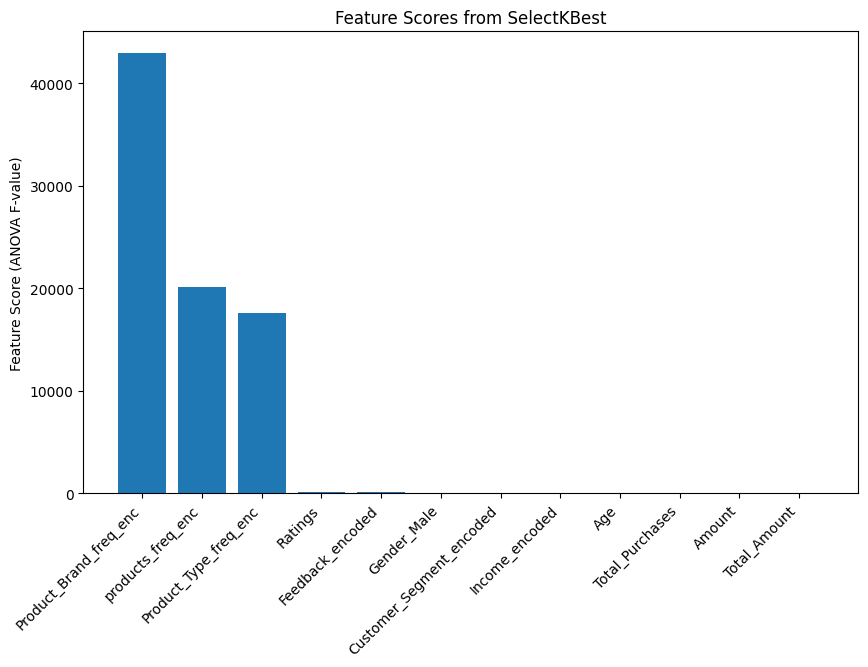

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import matplotlib.pyplot as plt

X = merged_df.drop(columns=['Product_Category_encoded'])  # features
y = merged_df['Product_Category_encoded']                 # target

selector = SelectKBest(score_func=f_classif, k=8)          # select top 8 features
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected features:", list(selected_features))

# Get scores for all features
feature_scores = selector.scores_

# Create a DataFrame to show all features and their scores
scores_df = pd.DataFrame({'Feature': X.columns, 'Score': feature_scores})

# Sort by score descending
scores_df = scores_df.sort_values(by='Score', ascending=False)
print("\nFeature scores:")
print(scores_df)

# Optional: Plot feature scores for visualization
plt.figure(figsize=(10,6))
plt.bar(scores_df['Feature'], scores_df['Score'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Feature Score (ANOVA F-value)')
plt.title('Feature Scores from SelectKBest')
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10715
           1       1.00      1.00      1.00     10618
           2       1.00      1.00      1.00     14009
           3       1.00      1.00      1.00     12938
           4       1.00      1.00      1.00     10503

    accuracy                           1.00     58783
   macro avg       1.00      1.00      1.00     58783
weighted avg       1.00      1.00      1.00     58783



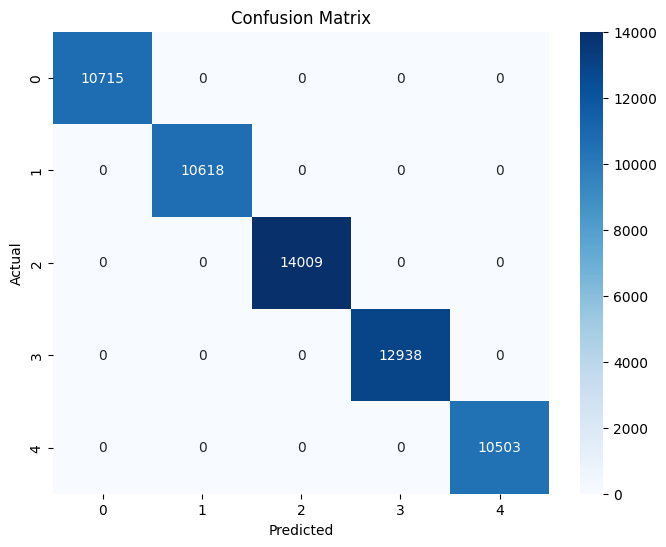

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = merged_df[['products_freq_enc', 'Product_Type_freq_enc', 'Product_Brand_freq_enc']]
y = merged_df['Product_Category_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [46]:
features = ['Total_Purchases', 'Amount', 'Total_Amount',]
X = merged_df[features]

In [ ]:
from sklearn.cluster import KMeans

# Run clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

print(clusters[:10])

# If you want to analyze clusters along with original data temporarily, do:
clustered_data = merged_df[features].copy()
clustered_data['Customer_Cluster'] = clusters

# But if you don't want to add column permanently, just use 'clusters' as is


[0 2 2 1 0 2 2 0 1 1]


In [50]:
clustered_data.head()

,Total_Purchases,Amount,Total_Amount,Customer_Cluster
0,-0.822701,-1.040570,-0.929419,0
1,-1.171323,1.048181,-0.498220,2
2,-0.822701,0.702493,-0.268848,2
3,0.571788,0.687853,0.985040,1
4,-1.171323,-0.925654,-0.996904,0
